### Double Triangle Expansion


There are several ways to define double triangle expansion. The definition used here is the following. Double triangle expansion is an operation on two distinct edges $e_1$ and $e_2$ of a graph $G$. The edges are subdivided and the resultant degree $2$ vertices are identified. Furthermore, we require that $e_1$ is an edge of some triangle $T$, and that $e_2$ is not an edge of $T$, is incident to a vertex in $T$, and is not adjacent to $e_1$. Another way to think about it is that it is an operation on a triangle and edge subgraph $H$ of $G$, whereby the (only) two non-adjacent edges in $H$ are subdivided and the resultant degree $2$ vertices are identified.


### Double Triangle Reduction


Double triangle reduction is the inverse of double triangle expansion. There are several ways to define it, but the definition used here is the following. Double triangle reduction is an operation that takes a double triangle with vertices $\{v_0,v_1,v_2,v_3\}$ in a graph $G$, with $(v_0,v_2)$ the common edge between the two triangles. The edges $(v_0,v_3)$, $(v_1,v_3)$ and $(v_2,v_3)$ are removed, and $v_0$ and $v_3$ are identified. We usually require further that the double triangle is not a subgraph of some triple triangle in $G$. This is necessary for some results by Schnetz related to the ancestor of a family to hold.


### Double Triangle Ancestor


The double triangle ancestor of a graph $G$ is the graph $A$ that is obtained by repeatedly reducing double triangles, starting from G, until unable to do so. Again, we usually require that the reduced double triangles were not part of triple triangles. Note that this definition is slightly different from Schnetz's original definition of ancestor, which includes product splits, an operation that he proved commutes with double triangle reduction.

In [1]:
# DTEGraph (Double Triangle Expandable eGraph) is based on eGraph and inherits all of its functions. 
## DTEGraph has additional functions to deal with double triangle expansion and reduction.

sys.path.append('..')

from eGraph.DTEGraph import DTEGraph

import common.graphs as cg
import common.functions as cf

1) True


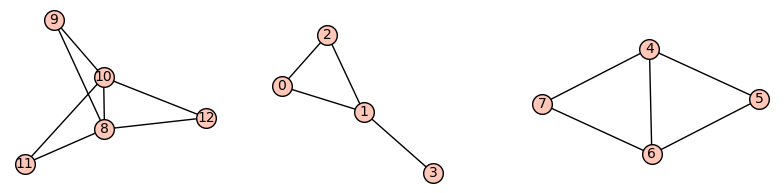

In [2]:
# Some relevant subgraphs

## Triangle and Edge AKA Tadpole(3,1) (Note that the vertex labelling is different between the two.)
TE = cg.triangle_and_edge() # Vertices = [0,1,2,3]
TP = graphs.TadpoleGraph(3,1)

cf.autonum_print(TE.is_isomorphic(TP)) # Should be True.
#cf.num_print(2, TE == TP)  #Takes a while. Unsure why.

DT = cg.double_triangle()
DT.relabel([i+max(TE.vertices())+1 for i in range(0,4)]) # Vertices = [4,5,6,7]

TT = cg.triple_triangle()
TT.relabel([i+max(DT.vertices())+1 for i in range(0,5)]) # Vertices = [8,9,10,11,12]

G = TE.union(DT).union(TT)
G.plot() # Might not be drawn in the same order.

In [3]:
# DTE

G = DTEGraph(cg.K5())

cf.autonum_print(G.is_isomorphic(cg.Z(3))) # K_5 is isomorphic to Z_3.

e1, e2 = G.triangle_and_edge_iterator(return_edges=True).next()[0:2] 
# The first two edges (out of 4) are the ones to be taken as input into DTE.

G1 = G.DTE(e1,e2)

cf.autonum_print(G1.is_isomorphic(cg.Z(4))) # G1 should be isomorphic to the 1-zigzag Z_4.

e1, e2 = G1.triangle_and_edge_iterator(return_edges=True).next()[0:2]

G2 = G1.DTE(e1,e2) 

cf.autonum_print(G2.is_isomorphic(cg.Z(5))) # G2 should be isomorphic to the 1-zigzag Z_5.

## Calling DTE with no arguments will result in an arbitrary triangle and edge being chosen and expanded.
###(The choice is not random but depends on the labelling).

G3 = G2.DTE()

cf.autonum_print(G2.order()) # Should be 7
cf.autonum_print(G3.order()) # Should be 8

#print(G2.DTE_edge_pairs_iterator().next())

2) True
3) True
4) True
5) 7
6) 8


In [4]:
# DTR

H2 = G2.DTR() # If called without any arguments, DTR will try to find a double triangle and reduce it.

cf.autonum_print(H2.is_isomorphic(G1)) # This should be true.

H1 = G1.DTR()

cf.autonum_print(H1.is_isomorphic(G)) # This should be true.

from eGraph.DTEGraph import NoProperDoubleTriangles

## As G is K5, it has no double triangles that are not part of triple triangles. G.DTR() raises a
### NoProperDoubleTriangles that could be caught.
try:
    H = G.DTR() 
    
except NoProperDoubleTriangles:
    cf.autonum_print('NoProperDoubleTriangles')

7) True
8) True
9) NoProperDoubleTriangles


In [5]:
# Double Triangle Ancestor

A = G.ancestor() # G is K_5, G1 is G after one DTE. G2 is G1 after one DTE.
A1 = G1.ancestor()
A2 = G2.ancestor()

ancestor_is_K5 = A.is_isomorphic(cg.K5()) and A1.is_isomorphic(cg.K5()) and A2.is_isomorphic(cg.K5())

cf.autonum_print(ancestor_is_K5) # Should be True

10) True


In [6]:
# Children
## We could also iterate over the children of a graph.

G = DTEGraph(cg.K5())

cf.autonum_print(len(list(G.children_iterator())))
### Default is to return all the labelled children. 
### There are (5 choose 2) edges * 3 opposite edges /2 = 15 unique labelled children of K5.

cf.autonum_print(len(list(G.children_iterator(only_nonisomorphic = True))))
# There is only one child of K5 up to isomorphism.

11) 15
12) 1


In [7]:
# Some subgraph checks
## It might be useful sometimes to check if graph has a 4-clique or a triple triangle.

G = DTEGraph(cg.K5())

cf.autonum_print(G.has_K4()) # True
cf.autonum_print(G.has_T3()) # True

13) True
14) True
